 ## Chapter5  特徴エンジニアリング

### 質的変数の処理

In [ ]:
import pandas as pd

df=pd.DataFrame([
  ['Cola','S'],
  ['Cola','M'],
  ['Green Tea','L'],
  ['Milk', 'M'],
],columns=['drink','size']
)

df.head(5)

,drink,size
0,Cola,S
1,Cola,M
2,Green Tea,L
3,Milk,M


In [ ]:
#　順序特徴量のマッピング
# 'size'を整数値に変換する
size2int={'S':0,'M':1,'L':2}
df['size']=df['size'].map(size2int) 
df.head()

#列データの種類確認
df['size'].unique()

array([0, 1, 2])

In [ ]:
#名義特徴量の変換
#'drink'を整数値にする
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["drinkLabel"]=encoder.fit_transform(df['drink'])
df.head()

#one-hotエンコーディング
pd.get_dummies(df) #文字が含まれる列をone-hotエンコーディングする

,size,drinkLabel,drink_Cola,drink_Green Tea,drink_Milk
0,0,0,1,0,0
1,1,0,1,0,0
2,2,1,0,1,0
3,1,2,0,0,1


### 量的変数の処理

In [ ]:
#データの作成
import pandas as pd
df=pd.DataFrame([
  [7.2500,],
  [71.2833,],
  [7.9250,],
  [53.1000,],
],columns=['Fare',]
)

df['Fare']

0     7.2500
1    71.2833
2     7.9250
3    53.1000
Name: Fare, dtype: float64

In [ ]:
#2値化
(df['Fare']>10).astype('int')

0    0
1    1
2    0
3    1
Name: Fare, dtype: int64

In [ ]:
#丸め
df['FareInt']=df['Fare'].round().astype(int)
ｄｆ.head()

,Fare,FareInt
0,7.2500,7
1,71.2833,71
2,7.9250,8
3,53.1000,53


### テキストのベクトル表現

In [ ]:
#one-hot エンコーディング
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True) #binary=True：頻度を考慮しない
docs=['the cat is out of the bag' , 'dogs are']
bow=vectorizer.fit_transform(docs) #fit_transform()でベクトル表現を得る
bow.toarray() #toarray()でarray形式に変換
#語彙を表示
vectorizer.vocabulary_

{'are': 0, 'bag': 1, 'cat': 2, 'dogs': 3, 'is': 4, 'of': 5, 'out': 6, 'the': 7}

In [ ]:
#Countエンコーディング
vectorizer = CountVectorizer(binary=False) #binary=False：頻度を考慮する
docs=['the cat is out of the bag' , 'dogs are']
bow=vectorizer.fit_transform(docs) #fit_transform()でベクトル表現を得る
bow.toarray() #toarray()でarray形式に変換

array([[0, 1, 1, 0, 1, 1, 1, 2],
       [1, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
docs=['the cat is out of the bag' , 'the dogs are']
tfidf=vectorizer.fit_transform(docs)
#dataFrame形式で結果を表示
vocab=vectorizer.get_feature_names() #get_feature_names()：取得した語彙をリスト形式で返す
pd.DataFrame(tfidf.toarray(),columns=vocab).round(2)

,are,bag,cat,dogs,is,of,out,the
0,0.00,0.38,0.38,0.00,0.38,0.38,0.38,0.54
1,0.63,0.00,0.00,0.63,0.00,0.00,0.00,0.45


In [ ]:
!pip install janome

     |████████████████████████████████| 19.7 MB 1.1 MB/s 


In [ ]:
#日本語を扱う時は、分かち書きをすること
from janome.tokenizer import Tokenizer
t = Tokenizer(wakati=True)
vectorizer = CountVectorizer(tokenizer=t.tokenize)
docs=['猫の子子猫','獅子の子子獅子']
bow=vectorizer.fit_transform(docs)
bow.toarray()

array([[1, 1, 1, 1, 0],
       [1, 2, 0, 0, 2]])

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2)) 
docs=['the cat is out of the bag' , 'dogs are']
bow=vectorizer.fit_transform(docs) #fit_transform()でベクトル表現を得る
#語彙を表示
vectorizer.vocabulary_

{'cat is': 0,
 'dogs are': 1,
 'is out': 2,
 'of the': 3,
 'out of': 4,
 'the bag': 5,
 'the cat': 6}

### **ベクトル表現の実践**

In [ ]:
#データセットの準備
import string
import pandas as pd
def filter_by_ascii_rate(text, threshold=0.9):
    ascii_letters = set(string.printable)
    rate = sum(c in ascii_letters for c in text) / len(text)
    return rate <= threshold

def load_dataset(filename, n=5000, state=6):
    df = pd.read_csv(filename, sep='\t')

    #'star_rating'の1~5評価を0,1の２値化
    mapping={1:0,2:0,3:0,4:1,5:1}
    df=df[df["star_rating"]!=3] #評価3はポジティブ/ネガティブの判別がつきにくいから除外
    df.star_rating=df.star_rating.map(mapping)

    # extracts Japanese texts.
    is_jp = df.review_body.apply(filter_by_ascii_rate)#日本語率が高いものを抽出
    df = df[is_jp]#bool型でTrueの行のみ抽出
    # sampling.
    df = df.sample(frac=1, random_state=state)  # shuffle
    grouped = df.groupby('star_rating')#'star_rating'でグループ分け
    df = grouped.head(n=n)
    return df.review_body.values, df.star_rating.values

url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_JP_v1_00.tsv.gz'
x, y = load_dataset(url, n=1000) #url直接指定で読み込み可能

In [ ]:
!pip install janome beautifulsoup4

     |████████████████████████████████| 19.7 MB 1.3 MB/s 


In [ ]:
#前処理
t = Tokenizer(wakati=True)
def tokenize(text):
    return t.tokenize(text)
def clean_html(html, strip=False):
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text(strip=strip)
    return text

In [ ]:
from janome.tokenizer import Tokenizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#学習用の関数
def train_and_eval(x_train, y_train, x_test, y_test,vectorizer):
    x_train_vec = vectorizer.fit_transform(x_train)
    x_test_vec = vectorizer.transform(x_test)
    clf = LogisticRegression(solver='liblinear')
    clf.fit(x_train_vec, y_train)
    y_pred = clf.predict(x_test_vec)
    score = accuracy_score(y_test, y_pred)
    print('{:.4f}'.format(score))

In [ ]:
print('Tokenization for faster experiments')
x_tokenized = [' '.join(tokenize(text)) for text in x]
x_train, x_test, y_train, y_test = train_test_split(x_tokenized, y, test_size=0.2, random_state=42)

print('Binary')
vectorizer = CountVectorizer(binary=True)
train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

print('Count')
vectorizer = CountVectorizer(binary=False)
train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

print('TF-IDF')
vectorizer = TfidfVectorizer()
train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

print('Bigram')
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

Tokenization for faster experiments
Binary
0.7475
Count
0.7650
TF-IDF
0.7900
Bigram
0.8025


###  特徴量のスケーリング

In [ ]:
#標準化
from sklearn.preprocessing import MinMaxScaler
data=[[-1,2],[-0.5,6],[0,10],[1,18]]
scaler=MinMaxScaler()
scaler.fit(data)
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [ ]:
#正規化
from sklearn.preprocessing import StandardScaler
data=[[0,10],[0,15],[1,20],[1,25]]
scaler=StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[-1.        , -1.34164079],
       [-1.        , -0.4472136 ],
       [ 1.        ,  0.4472136 ],
       [ 1.        ,  1.34164079]])

### 特徴選択の実践

In [1]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Vectorizing...')
vectorizer = CountVectorizer(tokenizer=tokenize)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
print(x_train.shape)
print(x_test.shape)

print('Selecting features...')
selector = SelectKBest(k=7000, score_func=mutual_info_classif) #スコア関数に「相互情報量」を使用
# selector = SelectKBest(k=7000)
selector.fit(x_train, y_train)
x_train_new = selector.transform(x_train)
x_test_new = selector.transform(x_test)
print(x_train_new.shape)
print(x_test_new.shape)

print('Evaluating...')
clf = LogisticRegression(solver='liblinear') #liblinearは小規模データに適しているsolver
clf.fit(x_train_new, y_train)
y_pred = clf.predict(x_test_new)
score = accuracy_score(y_test, y_pred)
print('{:.4f}'.format(score))

NameError: ignored

## Chapter6 機械学習アルゴリズム

#### ロジスティック回帰によるテキスト分類

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
from bs4 import BeautifulSoup
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split, GridSearchCV, ShuffleSplit

In [ ]:
#データの読み込み
def filter_by_ascii_rate(text, threshold=0.9):
    ascii_letters = set(string.printable)
    rate = sum(c in ascii_letters for c in text) / len(text)
    return rate <= threshold


def load_dataset(filename, n=5000, state=6):
    df = pd.read_csv(filename, sep='\t')

    # Converts multi-class to binary-class.
    mapping = {1: 0, 2: 0, 4: 1, 5: 1}
    df = df[df.star_rating != 3]
    df.star_rating = df.star_rating.map(mapping)

    # extracts Japanese texts.
    is_jp = df.review_body.apply(filter_by_ascii_rate)
    df = df[is_jp]

    # sampling.
    df = df.sample(frac=1, random_state=state)  # shuffle
    grouped = df.groupby('star_rating')
    df = grouped.head(n=n)

    return df.review_body.values, df.star_rating.values


url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_JP_v1_00.tsv.gz'
x, y = load_dataset(url, n=5000)

In [ ]:
#前処理
t = Tokenizer(wakati=True)


def tokenize(text):
    return t.tokenize(text)


def clean_html(html, strip=False):
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text(strip=strip)
    return text

In [ ]:
x = [clean_html(text, strip=True) for text in x]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(tokenizer=tokenize)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

#### 交差検証

In [ ]:
clf = LogisticRegression(solver='liblinear')
scores = cross_val_score(clf, x_train_vec, y_train, cv=5)
print(scores)
print('Accuracy: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))

clf.fit(x_train_vec, y_train)
y_pred = clf.predict(x_test_vec)
score = accuracy_score(y_test, y_pred)
print('Accuracy(test): {:.4f}'.format(score))

[0.8175   0.83375  0.8225   0.8275   0.820625]
Accuracy: 0.8244 (+/- 0.0114)
Accuracy(test): 0.8440


### 学習曲線

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')

    plt.legend(loc='best')

    plt.show()

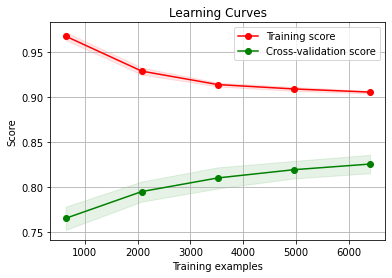

In [ ]:
title = 'Learning Curves'
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
clf = LogisticRegression(solver='liblinear')
plot_learning_curve(clf, title, x_train_vec, y_train, cv=cv)

In [ ]:
#グリッドサーチで探索する候補値
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.03, 0.1, 0.3, 0.7, 1, 1.01, 1.03, 1.07, 1.1, 1.3, 1.7, 3]
}
lr = LogisticRegression(solver='liblinear')
clf = GridSearchCV(lr, parameters, cv=5, n_jobs=-1) #cv：交差検定分割数/ n_jobs："並行して実行するジョブの数"
clf.fit(x_train_vec, y_train)

best_clf = clf.best_estimator_
print(clf.best_params_)
print('Accuracy(best): {:.4f}'.format(clf.best_score_))
y_pred = best_clf.predict(x_test_vec)
score = accuracy_score(y_test, y_pred)
print('Accuracy(test): {:.4f}'.format(score))

{'C': 3, 'penalty': 'l2'}
Accuracy(best): 0.8331
Accuracy(test): 0.8540
